![Uber Banner.png](<attachment:Uber Banner.png>)
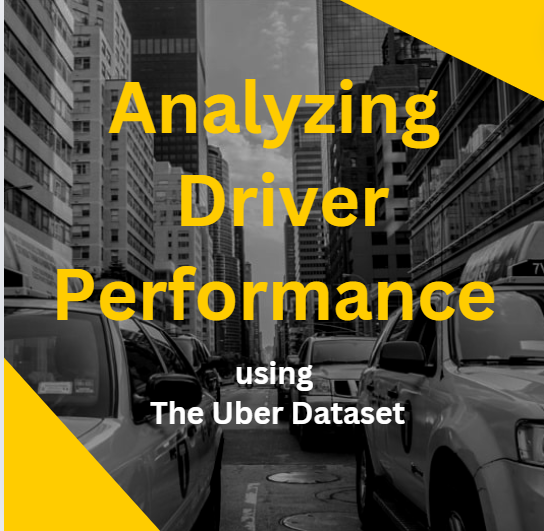

<h2 style="color:yellow">What this document contains:</h2>

1. Exploring the Data

2. Identifying Rush Month and Date of the Month

3. Identifying Rush Hours, Days and Dates

4. nalyzing Driver Availability for the Busiest Location

5. Plotting Driver Availability for each Day of the Week

6. Analyzing Driver Performance

7. Calculating Ride Duration for A Single Driver

8. Drivers with Highest no. of Completed Trips

9. Drivers with least no. of Completed Trips

10. Analyzing Consumer Demand

In [3]:
import pandas as pd
import matplotlib as mlt
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

<h1 style="color:yellow">Exploring the Data </h1>

In [4]:
dfUber = pd.read_csv('Uber.csv')
dfUber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [5]:
dfUber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [6]:
dfUber['Request timestamp'] = pd.to_datetime(dfUber['Request timestamp'], format='mixed')

dfUber['Request_Day'] = dfUber['Request timestamp'].dt.day
dfUber['Request_Month'] = dfUber['Request timestamp'].dt.month
dfUber['Request_Year'] = dfUber['Request timestamp'].dt.year

dfUber['Request_Time'] = dfUber['Request timestamp'].dt.time

dfUber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   datetime64[ns]
 5   Drop timestamp     2831 non-null   object        
 6   Request_Day        6745 non-null   int32         
 7   Request_Month      6745 non-null   int32         
 8   Request_Year       6745 non-null   int32         
 9   Request_Time       6745 non-null   object        
dtypes: datetime64[ns](1), float64(1), int32(3), int64(1), object(4)
memory usage: 448.0+ KB


In [7]:
dfUber.head(10)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request_Day,Request_Month,Request_Year,Request_Time
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,11/7/2016 13:00,7,11,2016,11:51:00
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,11/7/2016 18:47,7,11,2016,17:57:00
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,12/7/2016 9:58,7,12,2016,09:17:00
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,12/7/2016 22:03,7,12,2016,21:08:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,13-07-2016 09:25:47,13,7,2016,08:33:16
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,13-07-2016 22:28:59,13,7,2016,21:57:28
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,14-07-2016 07:13:15,14,7,2016,06:15:32
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,15-07-2016 06:07:52,15,7,2016,05:11:52
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,15-07-2016 18:50:51,15,7,2016,17:57:27
9,267,City,2.0,Trip Completed,2016-11-07 06:46:00,11/7/2016 7:25,7,11,2016,06:46:00


In [8]:
dfUber['Status'].unique()

array(['Trip Completed', 'Cancelled', 'No Cars Available'], dtype=object)

In [9]:
dfUber.isna().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
Request_Day             0
Request_Month           0
Request_Year            0
Request_Time            0
dtype: int64

In [10]:
dfUber.dropna(subset = ['Driver id', 'Drop timestamp'],inplace=True)
#subset allows us to specify the subset of columns
#inplace = True, specifies that the operation should be performed on the orignal dataframe,
#if set to false, or not specified, it returns a new df, with missing values dropped(leaves orignal df unchanged).

In [11]:
dfUber.shape

(2831, 10)

In [12]:
dfUber.isna().sum()

Request id           0
Pickup point         0
Driver id            0
Status               0
Request timestamp    0
Drop timestamp       0
Request_Day          0
Request_Month        0
Request_Year         0
Request_Time         0
dtype: int64

In [13]:
dfUber.describe()

,Request id,Driver id,Request timestamp,Request_Day,Request_Month,Request_Year
count,2831.000000,2831.000000,2831,2831.000000,2831.000000,2831.0
mean,3312.909573,148.328859,2016-09-06 03:49:24.630519296,11.118686,8.841752,2016.0
min,1.000000,1.000000,2016-07-13 00:06:34,7.000000,7.000000,2016.0
25%,1612.500000,74.000000,2016-07-14 07:42:59,7.000000,7.000000,2016.0
50%,3295.000000,149.000000,2016-07-15 15:15:03,13.000000,7.000000,2016.0
75%,4948.500000,223.000000,2016-11-07 19:05:30,14.000000,11.000000,2016.0
max,6766.000000,300.000000,2016-12-07 23:54:00,15.000000,12.000000,2016.0
std,1962.827100,86.352627,NaN,3.497709,2.229192,0.0


<h1 style="color:yellow;">Identifying Rush Month and Date of the Month</h1>

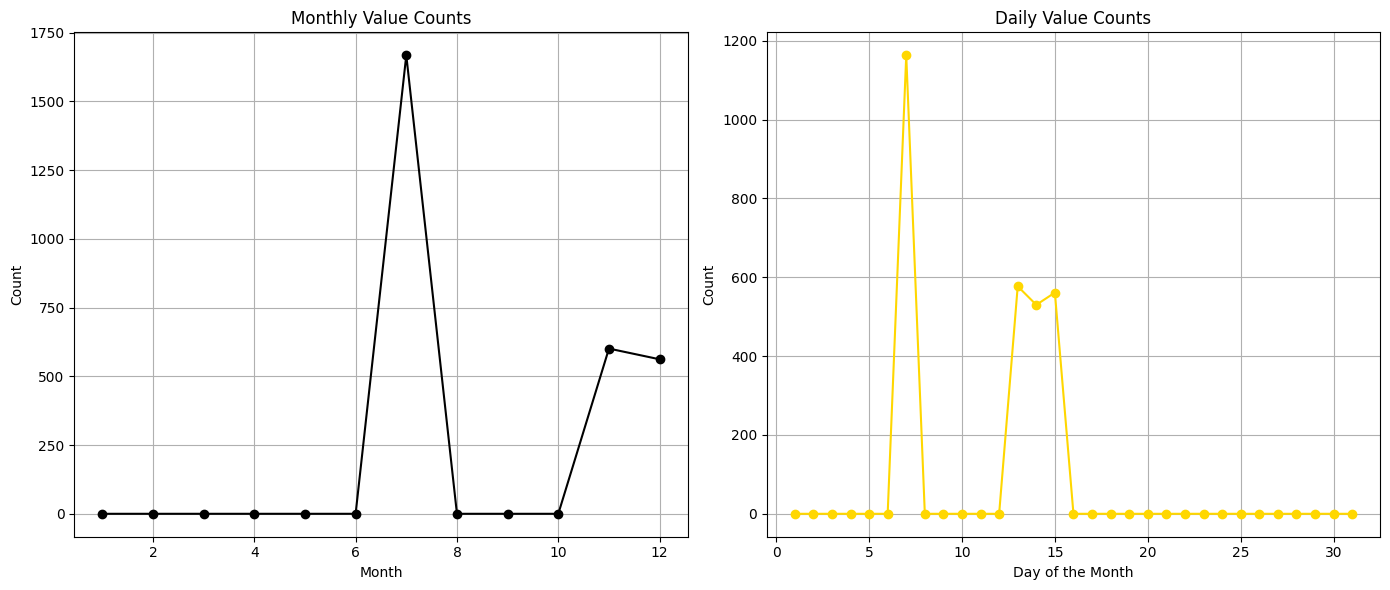

In [14]:
# Convert 'Request timestamp' to datetime
dfUber['Request timestamp'] = pd.to_datetime(dfUber['Request timestamp'])

# Extract month and day
#dfUber['month'] = dfUber['Request timestamp'].dt.month
#dfUber['day'] = dfUber['Request timestamp'].dt.day

# Create a range of months (1-12) and days (1-31)
all_months = pd.Series(range(1, 13))
all_days = pd.Series(range(1, 32))

# Count occurrences of each month and day
month_counts = dfUber['Request_Month'].value_counts().reindex(all_months, fill_value=0).sort_index()
day_counts = dfUber['Request_Day'].value_counts().reindex(all_days, fill_value=0).sort_index()

# Plot the value counts for month and day side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))  # 1 row, 2 columns

# Plot monthly counts
ax1.plot(month_counts.index, month_counts.values, marker='o', color='black')
ax1.set_title('Monthly Value Counts')
ax1.set_xlabel('Month')
ax1.set_ylabel('Count')
ax1.grid(True)

# Plot daily counts
ax2.plot(day_counts.index, day_counts.values, marker='o', color='gold')
ax2.set_title('Daily Value Counts')
ax2.set_xlabel('Day of the Month')
ax2.set_ylabel('Count')
ax2.grid(True)

plt.tight_layout()
plt.show()

In [61]:
dfUber['Request_Day'].unique()

array([ 7, 13, 14, 15])

<div style="color:yellow;"> 



<b><u>Time of the Month:</u></b>


7th of the Month

13th -15th of the Month



</div>

In [62]:

dfUber['Request_Month'].unique()

array([11, 12,  7])

<div style="color:yellow;"> 

<b><u>Months with Max. Demand:</u></b>

July

November

December

_______________________________________
</div>

<h1 style="color:yellow;">Identifying Rush Hours, Days and Dates</h1>


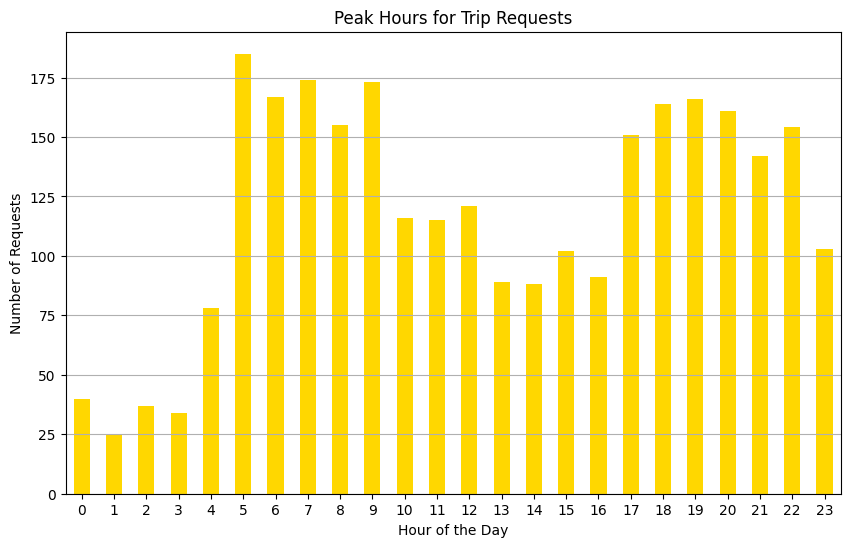

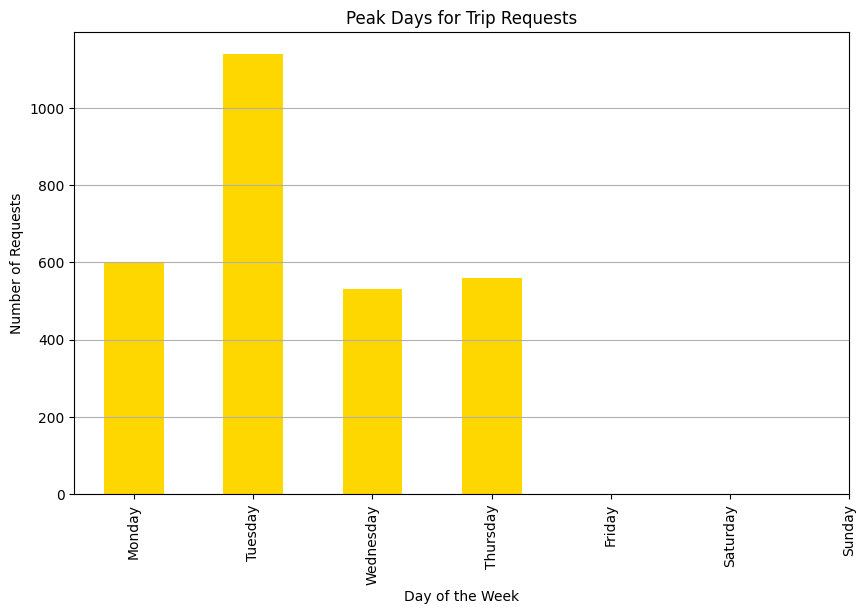

In [15]:

# Convert 'Request timestamp' column to datetime format
dfUber['Request timestamp'] = pd.to_datetime(dfUber['Request timestamp'], format = 'mixed')
# Extract hour and day of the week
dfUber['Hour'] = dfUber['Request timestamp'].dt.hour
dfUber['Day_of_week'] = dfUber['Request timestamp'].dt.dayofweek  
# Monday=0, tuesday = 1, wednesday = 2, thursday=3, friday=4, saturday=5, Sunday=6

# Aggregate data based on hour and day of the week
hourly_requests = dfUber.groupby('Hour').size()
daily_requests = dfUber.groupby('Day_of_week').size()
#.size() counts the no. of unique values in each column

# Plot peak hours
plt.figure(figsize=(10, 6))
hourly_requests.plot(kind='bar', color='gold')
plt.title('Peak Hours for Trip Requests')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Requests')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

# Plot peak days
plt.figure(figsize=(10, 6))
daily_requests.plot(kind='bar', color='gold')
plt.title('Peak Days for Trip Requests')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Requests')
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=90)
plt.grid(axis='y')
plt.show()



<div style="color:yellow;"> 

Morning Rush Hours are from 5:00 a.m. to 9:00 a.m.

Evening Rush Hours are from 5:00 p.m. to 9:00 p.m.

Tuesday is the max rush day of the week followed by Thursday, Wednesday and Monday.

</div>

In [16]:
dfUber['Pickup point'].unique()

array(['Airport', 'City'], dtype=object)

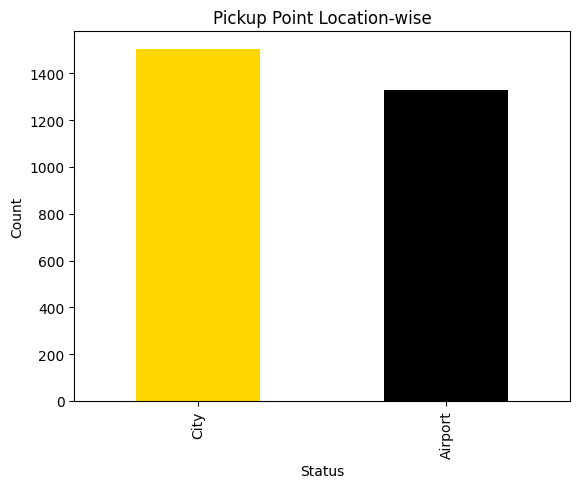

In [17]:
status_counts = dfUber['Pickup point'].value_counts()

# Plotting the bar chart
status_counts.plot(kind='bar', color=['gold', 'black'])

plt.title('Pickup Point Location-wise')
plt.xlabel('Status')
plt.ylabel('Count')


plt.show()

<h1 style="color:yellow;">Analyzing Driver Availability for the Busiest Location</h1>


In [18]:
dfAirport = dfUber[dfUber['Pickup point']=='Airport']
dfAirport.head(10)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request_Day,Request_Month,Request_Year,Request_Time,Hour,Day_of_week
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,11/7/2016 13:00,7,11,2016,11:51:00,11,0
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,11/7/2016 18:47,7,11,2016,17:57:00,17,0
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,12/7/2016 22:03,7,12,2016,21:08:00,21,2
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,13-07-2016 22:28:59,13,7,2016,21:57:28,21,2
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,14-07-2016 07:13:15,14,7,2016,06:15:32,6,3
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,15-07-2016 06:07:52,15,7,2016,05:11:52,5,4
10,1467,Airport,2.0,Trip Completed,2016-12-07 05:08:00,12/7/2016 6:02,7,12,2016,05:08:00,5,2
12,2784,Airport,2.0,Trip Completed,2016-07-13 04:49:20,13-07-2016 05:23:03,13,7,2016,04:49:20,4,2
15,3482,Airport,2.0,Trip Completed,2016-07-13 17:23:18,13-07-2016 18:20:51,13,7,2016,17:23:18,17,2
17,5335,Airport,2.0,Trip Completed,2016-07-14 22:24:13,14-07-2016 23:18:52,14,7,2016,22:24:13,22,3


In [19]:
dfAirport['Request timestamp'] = pd.to_datetime(dfAirport['Request timestamp'], format='mixed')
dfAirport.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1327 entries, 0 to 2830
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         1327 non-null   int64         
 1   Pickup point       1327 non-null   object        
 2   Driver id          1327 non-null   float64       
 3   Status             1327 non-null   object        
 4   Request timestamp  1327 non-null   datetime64[ns]
 5   Drop timestamp     1327 non-null   object        
 6   Request_Day        1327 non-null   int32         
 7   Request_Month      1327 non-null   int32         
 8   Request_Year       1327 non-null   int32         
 9   Request_Time       1327 non-null   object        
 10  Hour               1327 non-null   int32         
 11  Day_of_week        1327 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(5), int64(1), object(4)
memory usage: 108.9+ KB


C:\Users\Dell\AppData\Local\Temp\ipykernel_2672\367471062.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfAirport['Request timestamp'] = pd.to_datetime(dfAirport['Request timestamp'], format='mixed')


In [20]:
from datetime import time

# Convert 'Request_Time' to datetime and then extract the time
# dfAirport['Request timestamp'] = pd.to_datetime(dfAirport['Request timestamp']).dt.time

# Define the 4-hour bins as time objects
time_bins = [time(0, 0), time(4, 0), time(8, 0), time(12, 0), time(16, 0), time(20, 0), time(23, 59, 59)]
labels = ['12:00 a.m. - 04:00 a.m.', '04:00 a.m. - 08:00 a.m.', '08:00 a.m. - 12:00 p.m.', '12:00 p.m. - 04:00 p.m.', '04:00 p.m. - 08:00 p.m.', '08:00 p.m. - 12:00 a.m.']

# Function to categorize time into bins
def categorize_time(request_time):
    for i, t in enumerate(time_bins[:-1]):
        if t <= request_time < time_bins[i + 1]:
            return labels[i]
    return labels[-1]

# Apply the categorization function
dfAirport['Request_Time_Category'] = dfAirport['Request_Time'].apply(categorize_time)

# Print the DataFrame with the new column
dfAirport


C:\Users\Dell\AppData\Local\Temp\ipykernel_2672\568052568.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfAirport['Request_Time_Category'] = dfAirport['Request_Time'].apply(categorize_time)


,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request_Day,Request_Month,Request_Year,Request_Time,Hour,Day_of_week,Request_Time_Category
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,11/7/2016 13:00,7,11,2016,11:51:00,11,0,08:00 a.m. - 12:00 p.m.
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,11/7/2016 18:47,7,11,2016,17:57:00,17,0,04:00 p.m. - 08:00 p.m.
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,12/7/2016 22:03,7,12,2016,21:08:00,21,2,08:00 p.m. - 12:00 a.m.
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,13-07-2016 22:28:59,13,7,2016,21:57:28,21,2,08:00 p.m. - 12:00 a.m.
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,14-07-2016 07:13:15,14,7,2016,06:15:32,6,3,04:00 a.m. - 08:00 a.m.
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2822,3817,Airport,299.0,Trip Completed,2016-07-13 21:12:43,13-07-2016 22:05:34,13,7,2016,21:12:43,21,2,08:00 p.m. - 12:00 a.m.
2826,1315,Airport,300.0,Trip Completed,2016-11-07 22:54:00,11/7/2016 23:35,7,11,2016,22:54:00,22,0,08:00 p.m. - 12:00 a.m.
2828,3324,Airport,300.0,Trip Completed,2016-07-13 12:33:21,13-07-2016 13:16:03,13,7,2016,12:33:21,12,2,12:00 p.m. - 04:00 p.m.
2829,3935,Airport,300.0,Trip Completed,2016-07-13 22:26:08,13-07-2016 23:43:13,13,7,2016,22:26:08,22,2,08:00 p.m. - 12:00 a.m.


In [21]:
dfAirport.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1327 entries, 0 to 2830
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Request id             1327 non-null   int64         
 1   Pickup point           1327 non-null   object        
 2   Driver id              1327 non-null   float64       
 3   Status                 1327 non-null   object        
 4   Request timestamp      1327 non-null   datetime64[ns]
 5   Drop timestamp         1327 non-null   object        
 6   Request_Day            1327 non-null   int32         
 7   Request_Month          1327 non-null   int32         
 8   Request_Year           1327 non-null   int32         
 9   Request_Time           1327 non-null   object        
 10  Hour                   1327 non-null   int32         
 11  Day_of_week            1327 non-null   int32         
 12  Request_Time_Category  1327 non-null   object        
dtypes: datet

In [22]:
dfAirport['Request_Time_Category'].nunique()

6

In [23]:
dfAirport['Request_Time_Category'].value_counts()

Request_Time_Category
08:00 p.m. - 12:00 a.m.    277
04:00 a.m. - 08:00 a.m.    277
04:00 p.m. - 08:00 p.m.    276
08:00 a.m. - 12:00 p.m.    243
12:00 p.m. - 04:00 p.m.    187
12:00 a.m. - 04:00 a.m.     67
Name: count, dtype: int64

In [24]:
# Taking only a subset to reduce computation time

dfAirport_small = dfAirport[dfAirport['Driver id']<=100]
dfAirport_small.shape 

(465, 13)

In [25]:
import datetime
import numpy as np

result= []  
#Initializes an empty list named result to store pairs of drivers whose requests are within 5 minutes of each other
     
for i in dfAirport_small.index:
    time_i = dfAirport_small.loc[i]['Request timestamp']
    #The .loc method allows you to select rows and columns based on their labels, which could be either row labels, column labels, or a combination of both....here we are selecting the column 'Request timestamp'
    # time_i = pd.to_datetime(time _i)

    for j in dfAirport_small.index:

        if (i!=j):
        # ensuring that we're comparing different entries
            
            time_j = dfAirport_small.loc[j]['Request timestamp']
            # print(j)
            timeDiff_mins = abs(time_i-time_j)/np.timedelta64(1, 'm')
            #abs(time_i-time_j) gives a timedelta object(days=5, hours=3, minutes=30)
            #np.timedelta64(1, 'm'): This part of the expression converts the timedelta object into minutes.

            if timeDiff_mins < 5:
                result.append((dfAirport_small.loc[i,'Driver id'], dfAirport_small.loc[j,'Driver id']))
                # result.append((i,j))
            
print(result)             

[(1.0, 52.0), (1.0, 3.0), (1.0, 19.0), (1.0, 64.0), (3.0, 82.0), (3.0, 90.0), (3.0, 67.0), (3.0, 1.0), (4.0, 98.0), (4.0, 28.0), (4.0, 85.0), (5.0, 84.0), (5.0, 77.0), (5.0, 22.0), (6.0, 82.0), (6.0, 51.0), (6.0, 48.0), (6.0, 47.0), (7.0, 46.0), (7.0, 24.0), (7.0, 70.0), (8.0, 78.0), (9.0, 76.0), (9.0, 61.0), (9.0, 68.0), (9.0, 65.0), (9.0, 28.0), (9.0, 58.0), (9.0, 76.0), (9.0, 17.0), (10.0, 18.0), (10.0, 73.0), (10.0, 95.0), (11.0, 12.0), (11.0, 44.0), (12.0, 52.0), (12.0, 79.0), (12.0, 11.0), (12.0, 44.0), (13.0, 75.0), (14.0, 52.0), (15.0, 88.0), (16.0, 69.0), (16.0, 66.0), (16.0, 72.0), (17.0, 33.0), (17.0, 82.0), (17.0, 9.0), (17.0, 30.0), (18.0, 10.0), (18.0, 73.0), (18.0, 41.0), (18.0, 85.0), (18.0, 65.0), (19.0, 1.0), (19.0, 70.0), (19.0, 90.0), (20.0, 94.0), (21.0, 57.0), (21.0, 27.0), (21.0, 41.0), (21.0, 27.0), (22.0, 91.0), (22.0, 50.0), (22.0, 54.0), (22.0, 5.0), (22.0, 72.0), (23.0, 30.0), (23.0, 66.0), (24.0, 35.0), (24.0, 41.0), (24.0, 7.0), (24.0, 86.0), (25.0, 70.0),

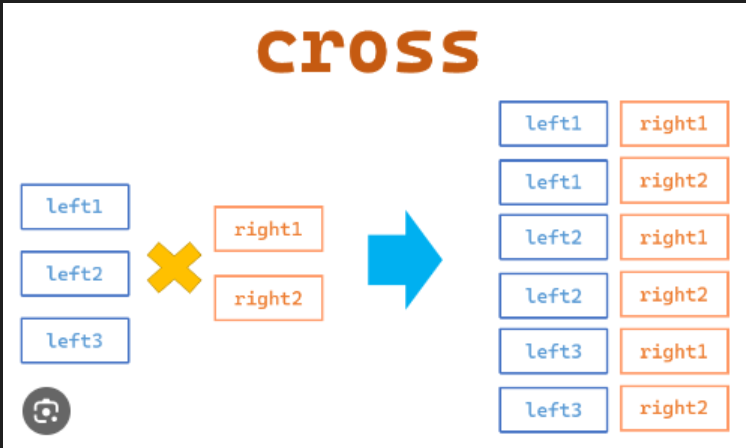

In [26]:
dfAirport_merged = dfAirport_small.merge(dfAirport_small, how='cross')
#Creating a DataFrame dfAirport_merged that contains all possible combinations of rows from dfAirport_small with itself

#explicitly generates all possible combinations of rows between two tables.

In [27]:
dfAirport_merged.head()

,Request id_x,Pickup point_x,Driver id_x,Status_x,Request timestamp_x,Drop timestamp_x,Request_Day_x,Request_Month_x,Request_Year_x,Request_Time_x,...,Status_y,Request timestamp_y,Drop timestamp_y,Request_Day_y,Request_Month_y,Request_Year_y,Request_Time_y,Hour_y,Day_of_week_y,Request_Time_Category_y
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,11/7/2016 13:00,7,11,2016,11:51:00,...,Trip Completed,2016-11-07 11:51:00,11/7/2016 13:00,7,11,2016,11:51:00,11,0,08:00 a.m. - 12:00 p.m.
1,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,11/7/2016 13:00,7,11,2016,11:51:00,...,Trip Completed,2016-11-07 17:57:00,11/7/2016 18:47,7,11,2016,17:57:00,17,0,04:00 p.m. - 08:00 p.m.
2,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,11/7/2016 13:00,7,11,2016,11:51:00,...,Trip Completed,2016-12-07 21:08:00,12/7/2016 22:03,7,12,2016,21:08:00,21,2,08:00 p.m. - 12:00 a.m.
3,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,11/7/2016 13:00,7,11,2016,11:51:00,...,Trip Completed,2016-07-13 21:57:28,13-07-2016 22:28:59,13,7,2016,21:57:28,21,2,08:00 p.m. - 12:00 a.m.
4,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,11/7/2016 13:00,7,11,2016,11:51:00,...,Trip Completed,2016-07-14 06:15:32,14-07-2016 07:13:15,14,7,2016,06:15:32,6,3,04:00 a.m. - 08:00 a.m.


In [28]:
dfAirport_merged = dfAirport_merged[dfAirport_merged['Driver id_x'] != dfAirport_merged['Driver id_y']]

# filters the DataFrame dfAirport_merged to remove rows where the 'Driver id' from the first DataFrame (Driver id_x) is not equal to the 'Driver id' from the second DataFrame (Driver id_y)

#effectively removing rows where the same driver is paired with themselves in the Cartesian product
dfAirport_merged

,Request id_x,Pickup point_x,Driver id_x,Status_x,Request timestamp_x,Drop timestamp_x,Request_Day_x,Request_Month_x,Request_Year_x,Request_Time_x,...,Status_y,Request timestamp_y,Drop timestamp_y,Request_Day_y,Request_Month_y,Request_Year_y,Request_Time_y,Hour_y,Day_of_week_y,Request_Time_Category_y
6,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,11/7/2016 13:00,7,11,2016,11:51:00,...,Trip Completed,2016-12-07 05:08:00,12/7/2016 6:02,7,12,2016,05:08:00,5,2,04:00 a.m. - 08:00 a.m.
7,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,11/7/2016 13:00,7,11,2016,11:51:00,...,Trip Completed,2016-07-13 04:49:20,13-07-2016 05:23:03,13,7,2016,04:49:20,4,2,04:00 a.m. - 08:00 a.m.
8,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,11/7/2016 13:00,7,11,2016,11:51:00,...,Trip Completed,2016-07-13 17:23:18,13-07-2016 18:20:51,13,7,2016,17:23:18,17,2,04:00 p.m. - 08:00 p.m.
9,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,11/7/2016 13:00,7,11,2016,11:51:00,...,Trip Completed,2016-07-14 22:24:13,14-07-2016 23:18:52,14,7,2016,22:24:13,22,3,08:00 p.m. - 12:00 a.m.
10,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,11/7/2016 13:00,7,11,2016,11:51:00,...,Trip Completed,2016-11-07 10:00:00,11/7/2016 10:31,7,11,2016,10:00:00,10,0,08:00 a.m. - 12:00 p.m.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216217,5834,Airport,100.0,Trip Completed,2016-07-15 08:54:03,15-07-2016 10:05:53,15,7,2016,08:54:03,...,Trip Completed,2016-07-15 15:17:13,15-07-2016 16:06:54,15,7,2016,15:17:13,15,4,12:00 p.m. - 04:00 p.m.
216218,5834,Airport,100.0,Trip Completed,2016-07-15 08:54:03,15-07-2016 10:05:53,15,7,2016,08:54:03,...,Trip Completed,2016-11-07 05:08:00,11/7/2016 6:09,7,11,2016,05:08:00,5,0,04:00 a.m. - 08:00 a.m.
216219,5834,Airport,100.0,Trip Completed,2016-07-15 08:54:03,15-07-2016 10:05:53,15,7,2016,08:54:03,...,Trip Completed,2016-11-07 23:11:00,12/7/2016 0:14,7,11,2016,23:11:00,23,0,08:00 p.m. - 12:00 a.m.
216220,5834,Airport,100.0,Trip Completed,2016-07-15 08:54:03,15-07-2016 10:05:53,15,7,2016,08:54:03,...,Trip Completed,2016-07-13 09:52:49,13-07-2016 10:33:38,13,7,2016,09:52:49,9,2,08:00 a.m. - 12:00 p.m.


<h1 style="color:yellow;">Calculating Time Difference for Request Timestamp</h1>


In [29]:
dfAirport_merged['Difference_Days']= abs(dfAirport_merged['Request timestamp_x']-dfAirport_merged['Request timestamp_y'])
# the absolute difference in days between the 'Request timestamp' values from the first and second DataFrames 

dfAirport_merged.head()

,Request id_x,Pickup point_x,Driver id_x,Status_x,Request timestamp_x,Drop timestamp_x,Request_Day_x,Request_Month_x,Request_Year_x,Request_Time_x,...,Request timestamp_y,Drop timestamp_y,Request_Day_y,Request_Month_y,Request_Year_y,Request_Time_y,Hour_y,Day_of_week_y,Request_Time_Category_y,Difference_Days
6,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,11/7/2016 13:00,7,11,2016,11:51:00,...,2016-12-07 05:08:00,12/7/2016 6:02,7,12,2016,05:08:00,5,2,04:00 a.m. - 08:00 a.m.,29 days 17:17:00
7,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,11/7/2016 13:00,7,11,2016,11:51:00,...,2016-07-13 04:49:20,13-07-2016 05:23:03,13,7,2016,04:49:20,4,2,04:00 a.m. - 08:00 a.m.,117 days 07:01:40
8,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,11/7/2016 13:00,7,11,2016,11:51:00,...,2016-07-13 17:23:18,13-07-2016 18:20:51,13,7,2016,17:23:18,17,2,04:00 p.m. - 08:00 p.m.,116 days 18:27:42
9,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,11/7/2016 13:00,7,11,2016,11:51:00,...,2016-07-14 22:24:13,14-07-2016 23:18:52,14,7,2016,22:24:13,22,3,08:00 p.m. - 12:00 a.m.,115 days 13:26:47
10,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,11/7/2016 13:00,7,11,2016,11:51:00,...,2016-11-07 10:00:00,11/7/2016 10:31,7,11,2016,10:00:00,10,0,08:00 a.m. - 12:00 p.m.,0 days 01:51:00


In [30]:
import numpy as np 

dfAirport_merged['Difference_Mins'] = dfAirport_merged['Difference_Days']/np.timedelta64(1, 'm')
#converts the difference in days between two timestamps into minutes and stores the result in a new column named 'Difference_Mins (timedelta object => minutes)

dfAirport_merged

,Request id_x,Pickup point_x,Driver id_x,Status_x,Request timestamp_x,Drop timestamp_x,Request_Day_x,Request_Month_x,Request_Year_x,Request_Time_x,...,Drop timestamp_y,Request_Day_y,Request_Month_y,Request_Year_y,Request_Time_y,Hour_y,Day_of_week_y,Request_Time_Category_y,Difference_Days,Difference_Mins
6,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,11/7/2016 13:00,7,11,2016,11:51:00,...,12/7/2016 6:02,7,12,2016,05:08:00,5,2,04:00 a.m. - 08:00 a.m.,29 days 17:17:00,42797.000000
7,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,11/7/2016 13:00,7,11,2016,11:51:00,...,13-07-2016 05:23:03,13,7,2016,04:49:20,4,2,04:00 a.m. - 08:00 a.m.,117 days 07:01:40,168901.666667
8,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,11/7/2016 13:00,7,11,2016,11:51:00,...,13-07-2016 18:20:51,13,7,2016,17:23:18,17,2,04:00 p.m. - 08:00 p.m.,116 days 18:27:42,168147.700000
9,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,11/7/2016 13:00,7,11,2016,11:51:00,...,14-07-2016 23:18:52,14,7,2016,22:24:13,22,3,08:00 p.m. - 12:00 a.m.,115 days 13:26:47,166406.783333
10,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,11/7/2016 13:00,7,11,2016,11:51:00,...,11/7/2016 10:31,7,11,2016,10:00:00,10,0,08:00 a.m. - 12:00 p.m.,0 days 01:51:00,111.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216217,5834,Airport,100.0,Trip Completed,2016-07-15 08:54:03,15-07-2016 10:05:53,15,7,2016,08:54:03,...,15-07-2016 16:06:54,15,7,2016,15:17:13,15,4,12:00 p.m. - 04:00 p.m.,0 days 06:23:10,383.166667
216218,5834,Airport,100.0,Trip Completed,2016-07-15 08:54:03,15-07-2016 10:05:53,15,7,2016,08:54:03,...,11/7/2016 6:09,7,11,2016,05:08:00,5,0,04:00 a.m. - 08:00 a.m.,114 days 20:13:57,165373.950000
216219,5834,Airport,100.0,Trip Completed,2016-07-15 08:54:03,15-07-2016 10:05:53,15,7,2016,08:54:03,...,12/7/2016 0:14,7,11,2016,23:11:00,23,0,08:00 p.m. - 12:00 a.m.,115 days 14:16:57,166456.950000
216220,5834,Airport,100.0,Trip Completed,2016-07-15 08:54:03,15-07-2016 10:05:53,15,7,2016,08:54:03,...,13-07-2016 10:33:38,13,7,2016,09:52:49,9,2,08:00 a.m. - 12:00 p.m.,1 days 23:01:14,2821.233333


In [31]:
dfResult = dfAirport_merged[dfAirport_merged['Difference_Mins']<5]

dfResult

,Request id_x,Pickup point_x,Driver id_x,Status_x,Request timestamp_x,Drop timestamp_x,Request_Day_x,Request_Month_x,Request_Year_x,Request_Time_x,...,Drop timestamp_y,Request_Day_y,Request_Month_y,Request_Year_y,Request_Time_y,Hour_y,Day_of_week_y,Request_Time_Category_y,Difference_Days,Difference_Mins
1175,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,12/7/2016 22:03,7,12,2016,21:08:00,...,12/7/2016 22:20,7,12,2016,21:04:00,21,2,08:00 p.m. - 12:00 a.m.,0 days 00:04:00,4.000000
1411,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,13-07-2016 22:28:59,13,7,2016,21:57:28,...,13-07-2016 22:51:23,13,7,2016,21:54:18,21,2,08:00 p.m. - 12:00 a.m.,0 days 00:03:10,3.166667
1954,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,14-07-2016 07:13:15,14,7,2016,06:15:32,...,14-07-2016 06:59:46,14,7,2016,06:11:51,6,3,04:00 a.m. - 08:00 a.m.,0 days 00:03:41,3.683333
2615,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,15-07-2016 06:07:52,15,7,2016,05:11:52,...,15-07-2016 06:09:36,15,7,2016,05:10:13,5,4,04:00 a.m. - 08:00 a.m.,0 days 00:01:39,1.650000
5036,535,Airport,3.0,Trip Completed,2016-11-07 10:00:00,11/7/2016 10:31,7,11,2016,10:00:00,...,11/7/2016 10:47,7,11,2016,10:01:00,10,0,08:00 a.m. - 12:00 p.m.,0 days 00:01:00,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212336,5955,Airport,98.0,Trip Completed,2016-07-15 10:45:56,15-07-2016 11:48:25,15,7,2016,10:45:56,...,15-07-2016 11:20:09,15,7,2016,10:42:35,10,4,08:00 a.m. - 12:00 p.m.,0 days 00:03:21,3.350000
213165,101,Airport,99.0,Trip Completed,2016-11-07 05:08:00,11/7/2016 6:09,7,11,2016,05:08:00,...,11/7/2016 5:52,7,11,2016,05:11:00,5,0,04:00 a.m. - 08:00 a.m.,0 days 00:03:00,3.000000
213740,1330,Airport,99.0,Trip Completed,2016-11-07 23:11:00,12/7/2016 0:14,7,11,2016,23:11:00,...,11/7/2016 23:45,7,11,2016,23:10:00,23,0,08:00 p.m. - 12:00 a.m.,0 days 00:01:00,1.000000
214033,3227,Airport,99.0,Trip Completed,2016-07-13 09:52:49,13-07-2016 10:33:38,13,7,2016,09:52:49,...,13-07-2016 10:24:39,13,7,2016,09:51:41,9,2,08:00 a.m. - 12:00 p.m.,0 days 00:01:08,1.133333


In [32]:
dfAirport.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1327 entries, 0 to 2830
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Request id             1327 non-null   int64         
 1   Pickup point           1327 non-null   object        
 2   Driver id              1327 non-null   float64       
 3   Status                 1327 non-null   object        
 4   Request timestamp      1327 non-null   datetime64[ns]
 5   Drop timestamp         1327 non-null   object        
 6   Request_Day            1327 non-null   int32         
 7   Request_Month          1327 non-null   int32         
 8   Request_Year           1327 non-null   int32         
 9   Request_Time           1327 non-null   object        
 10  Hour                   1327 non-null   int32         
 11  Day_of_week            1327 non-null   int32         
 12  Request_Time_Category  1327 non-null   object        
dtypes: datet

<h1 style="color:yellow">Plotting Driver Availability for each Day of the Week </h1>

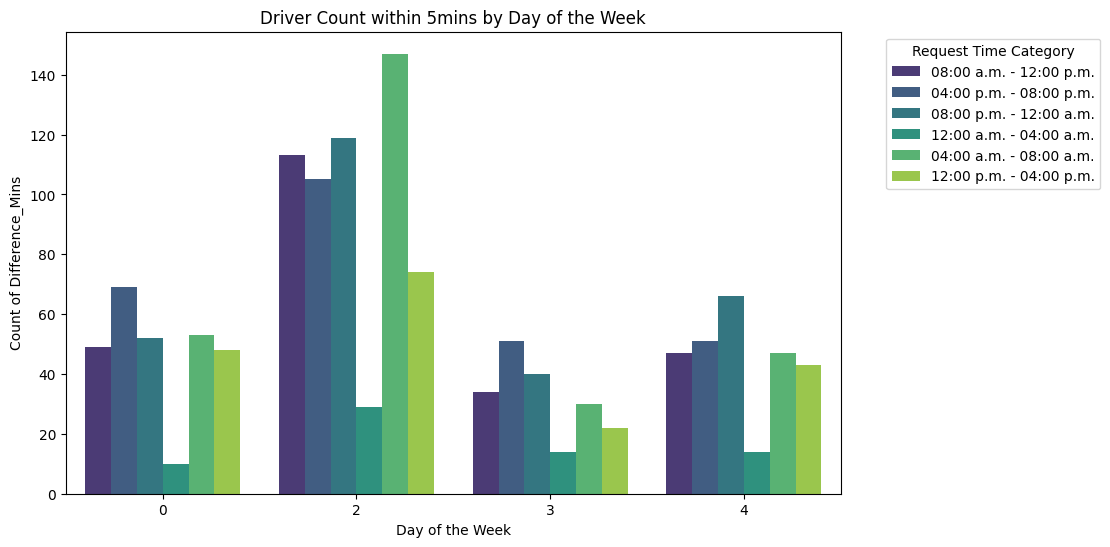

In [33]:
plt.figure(figsize=(10, 6))
sns.countplot(data=dfAirport, x='Day_of_week', hue='Request_Time_Category', palette='viridis')
plt.xlabel('Day of the Week')
plt.ylabel('Count of Difference_Mins')
plt.title('Driver Count within 5mins by Day of the Week')
plt.legend(title='Request Time Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [60]:
dfAirport['Day_of_week'].unique()


array([0, 2, 3, 4])

<h5 style="color:gold">In the following dataset, the Driver has only worked for Monday, Wednesday, Thursday and Friday.
</h5>

<h1 style="color:yellow;">Analyzing Driver Performance</h1>


In [34]:
dfUber['Driver id'].unique()

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100., 101., 102., 103., 104., 105., 106., 107., 108., 109., 110.,
       111., 112., 113., 114., 115., 116., 117., 118., 119., 120., 121.,
       122., 123., 124., 125., 126., 127., 128., 129., 130., 131., 132.,
       133., 134., 135., 136., 137., 138., 139., 140., 141., 142., 143.,
       144., 145., 146., 147., 148., 149., 150., 15

<h1 style="color:yellow;">Analyzing Consumer Demand</h1>

In [35]:
dfUber['Request id'].describe()

count    2831.000000
mean     3312.909573
std      1962.827100
min         1.000000
25%      1612.500000
50%      3295.000000
75%      4948.500000
max      6766.000000
Name: Request id, dtype: float64

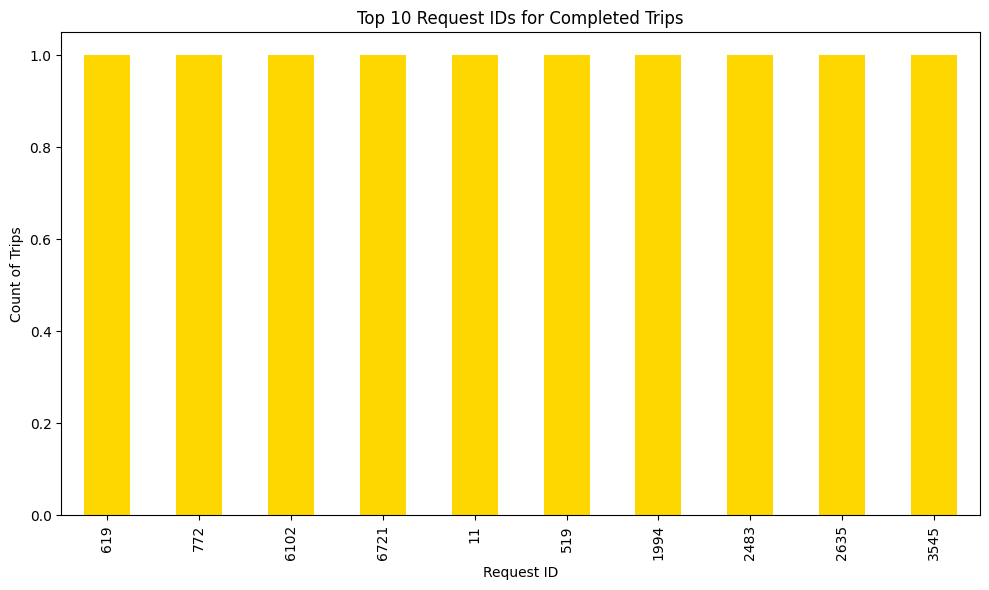

In [36]:

# Filter DataFrame for rows where 'Status' is 'Trip Completed'
completed_trips = dfUber[dfUber['Status'] == 'Trip Completed']

# Count the occurrences of each 'Driver id'
driver_id_counts = completed_trips['Request id'].value_counts().head(10)

# Plot the top 10 values for the count of 'Driver id'
plt.figure(figsize=(10, 6))
driver_id_counts.plot(kind='bar', color='gold')

# Adding title and labels
plt.title('Top 10 Request IDs for Completed Trips')
plt.xlabel('Request ID')
plt.ylabel('Count of Trips')

# Display the plot
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

<h5 style="color:gold">The maximum no. of trips taken by customers is just One.</h5>

<h3 style="color:yellow;">Drivers with Highest no. of Completed Trips</h3>

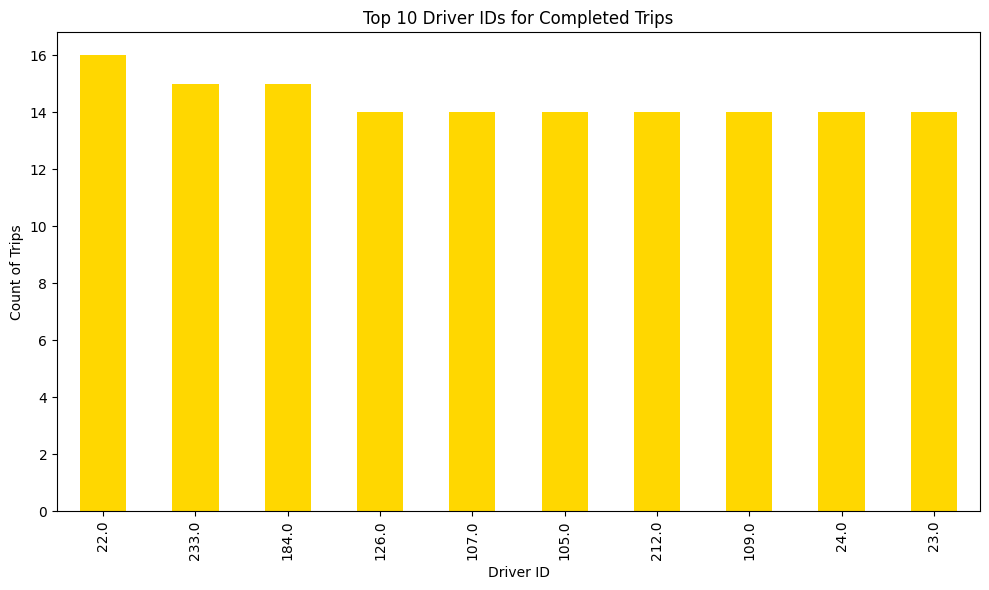

In [45]:


# Filter DataFrame for rows where 'Status' is 'Trip Completed'
completed_trips = dfUber[dfUber['Status'] == 'Trip Completed']

# Count the occurrences of each 'Driver id'
driver_id_counts = completed_trips['Driver id'].value_counts().head(10)

# Plot the top 10 values for the count of 'Driver id'
plt.figure(figsize=(10, 6))
driver_id_counts.plot(kind='bar', color='gold')

# Adding title and labels
plt.title('Top 10 Driver IDs for Completed Trips')
plt.xlabel('Driver ID')
plt.ylabel('Count of Trips')

# Display the plot
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

<h5 style="color:gold">Driver id 22.0 with Max no. of Tips = 16 followed by 14 and 12.</h5>

<h3 style="color:yellow;">Drivers with least no. of Completed Trips</h3>

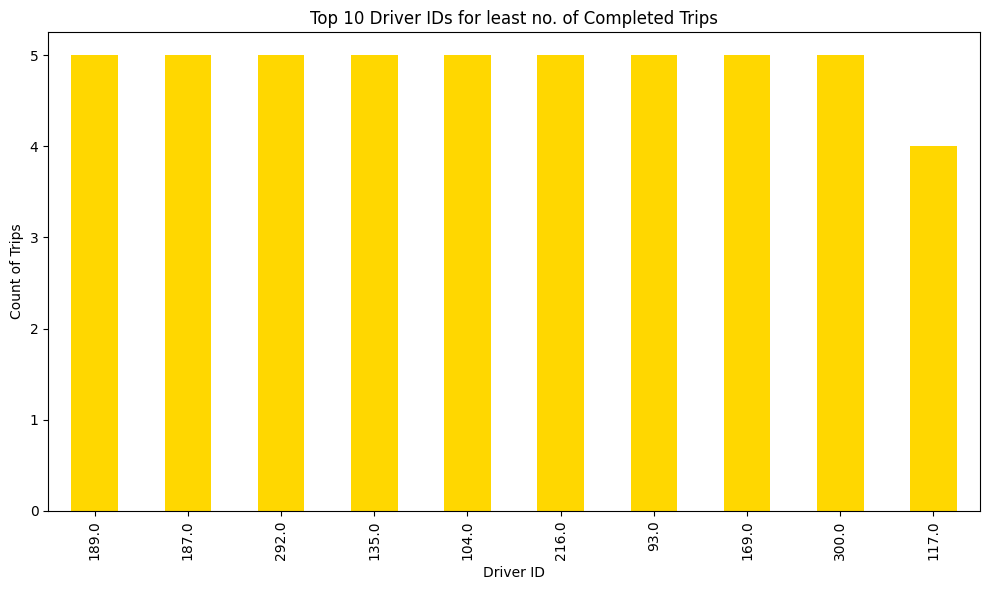

In [50]:


# Filter DataFrame for rows where 'Status' is 'Trip Completed'
completed_trips = dfUber[dfUber['Status'] == 'Trip Completed']

# Count the occurrences of each 'Driver id'
driver_id_counts = completed_trips['Driver id'].value_counts().tail(10)

# Plot the top 10 values for the count of 'Driver id'
plt.figure(figsize=(10, 6))
driver_id_counts.plot(kind='bar', color='gold')

# Adding title and labels
plt.title('Top 10 Driver IDs for least no. of Completed Trips')
plt.xlabel('Driver ID')
plt.ylabel('Count of Trips')

# Display the plot
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

<h5 style="color:gold">As Driver with Id no. 22.0 has taken the max. no. of trips, let us now calculate the Duration of all of the Trips/Rides he has completed.</h5>


<h2 style="color:yellow;">Calculating Ride Duration for A Single Driver</h2>

In [37]:
dfDriverID_22 = dfUber[dfUber['Driver id'] == 22.0]
dfDriverID_22.head(10)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request_Day,Request_Month,Request_Year,Request_Time,Hour,Day_of_week
199,110,City,22.0,Trip Completed,2016-11-07 05:05:00,11/7/2016 6:06,7,11,2016,05:05:00,5,0
200,362,City,22.0,Trip Completed,2016-11-07 08:01:00,11/7/2016 9:18,7,11,2016,08:01:00,8,0
201,666,Airport,22.0,Trip Completed,2016-11-07 13:02:00,11/7/2016 13:45,7,11,2016,13:02:00,13,0
202,926,City,22.0,Trip Completed,2016-11-07 18:28:00,11/7/2016 19:34,7,11,2016,18:28:00,18,0
203,1180,Airport,22.0,Trip Completed,2016-11-07 21:01:00,11/7/2016 22:14,7,11,2016,21:01:00,21,0
204,1900,City,22.0,Trip Completed,2016-12-07 10:32:00,12/7/2016 11:42,7,12,2016,10:32:00,10,2
205,2506,City,22.0,Trip Completed,2016-12-07 21:01:00,12/7/2016 21:38,7,12,2016,21:01:00,21,2
206,3064,City,22.0,Trip Completed,2016-07-13 08:02:03,13-07-2016 08:58:46,13,7,2016,08:02:03,8,2
207,3327,Airport,22.0,Trip Completed,2016-07-13 12:24:41,13-07-2016 13:23:39,13,7,2016,12:24:41,12,2
208,3601,City,22.0,Trip Completed,2016-07-13 18:39:00,13-07-2016 19:29:07,13,7,2016,18:39:00,18,2


In [38]:
dfDriverID_22.shape

(16, 12)

In [39]:
# Convert 'Request timestamp' and 'Drop timestamp' to datetime format with the correct format
dfDriverID_22['Request timestamp'] = pd.to_datetime(dfDriverID_22['Request timestamp'],format='mixed')
dfDriverID_22['Drop timestamp'] = pd.to_datetime(dfDriverID_22['Drop timestamp'], format='mixed')

# Calculate 'Ride Duration' and 'Ride Duration (mins)'
dfDriverID_22['Ride Duration'] = (dfDriverID_22['Drop timestamp'] - dfDriverID_22['Request timestamp']).dt.total_seconds() / 60

# Display the updated DataFrame with all columns
dfDriverID_22.head(20)


C:\Users\Dell\AppData\Local\Temp\ipykernel_2672\3418583728.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfDriverID_22['Request timestamp'] = pd.to_datetime(dfDriverID_22['Request timestamp'],format='mixed')
C:\Users\Dell\AppData\Local\Temp\ipykernel_2672\3418583728.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfDriverID_22['Drop timestamp'] = pd.to_datetime(dfDriverID_22['Drop timestamp'], format='mixed')
C:\Users\Dell\AppData\Local\Temp\ipykernel_2672\3418583728.py:6: SettingWithCopyWarning: 

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request_Day,Request_Month,Request_Year,Request_Time,Hour,Day_of_week,Ride Duration
199,110,City,22.0,Trip Completed,2016-11-07 05:05:00,2016-11-07 06:06:00,7,11,2016,05:05:00,5,0,61.000000
200,362,City,22.0,Trip Completed,2016-11-07 08:01:00,2016-11-07 09:18:00,7,11,2016,08:01:00,8,0,77.000000
201,666,Airport,22.0,Trip Completed,2016-11-07 13:02:00,2016-11-07 13:45:00,7,11,2016,13:02:00,13,0,43.000000
202,926,City,22.0,Trip Completed,2016-11-07 18:28:00,2016-11-07 19:34:00,7,11,2016,18:28:00,18,0,66.000000
203,1180,Airport,22.0,Trip Completed,2016-11-07 21:01:00,2016-11-07 22:14:00,7,11,2016,21:01:00,21,0,73.000000
204,1900,City,22.0,Trip Completed,2016-12-07 10:32:00,2016-12-07 11:42:00,7,12,2016,10:32:00,10,2,70.000000
205,2506,City,22.0,Trip Completed,2016-12-07 21:01:00,2016-12-07 21:38:00,7,12,2016,21:01:00,21,2,37.000000
206,3064,City,22.0,Trip Completed,2016-07-13 08:02:03,2016-07-13 08:58:46,13,7,2016,08:02:03,8,2,56.716667
207,3327,Airport,22.0,Trip Completed,2016-07-13 12:24:41,2016-07-13 13:23:39,13,7,2016,12:24:41,12,2,58.966667
208,3601,City,22.0,Trip Completed,2016-07-13 18:39:00,2016-07-13 19:29:07,13,7,2016,18:39:00,18,2,50.116667


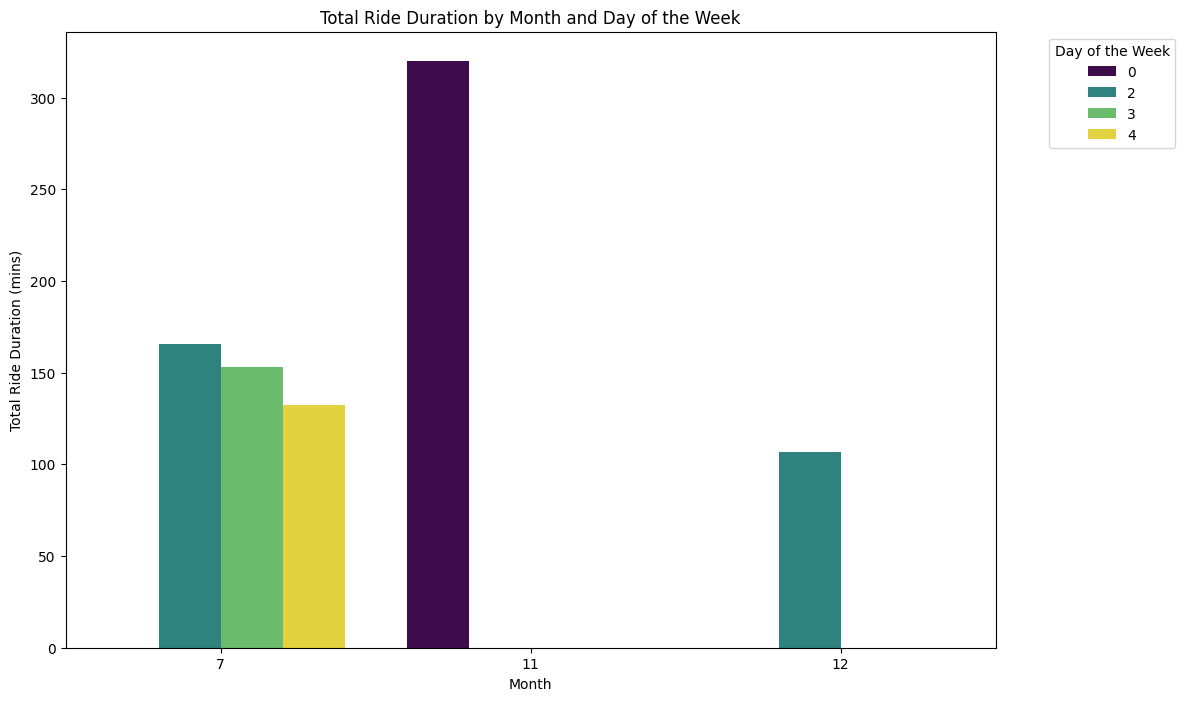

In [40]:
# Group by 'Request_Month', 'Day_of_week' and sum the 'Ride Duration'
monthly_duration = dfDriverID_22.groupby(['Request_Month', 'Day_of_week'])['Ride Duration'].sum().reset_index()

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(data=monthly_duration, x='Request_Month', y='Ride Duration', hue='Day_of_week', palette='viridis')
plt.xlabel('Month')
plt.ylabel('Total Ride Duration (mins)')
plt.title('Total Ride Duration by Month and Day of the Week')
plt.legend(title='Day of the Week', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

<h5 style="color:gold">Driver Id 22.0 has worked only for:

Months = 7,11 and 12 

and

Days Monday, Wednesday, Thursday, Friday.</h5>

<h5 style="color:gold">Now lets do the same for Driver with least no. of completed Trips</h5>


In [51]:
leastDriver = dfUber[dfUber['Driver id'] == 117.0]
leastDriver.head(10)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request_Day,Request_Month,Request_Year,Request_Time,Hour,Day_of_week
1126,3957,City,117.0,Trip Completed,2016-07-13 22:42:16,13-07-2016 23:43:32,13,7,2016,22:42:16,22,2
1127,4066,Airport,117.0,Trip Completed,2016-07-14 01:56:01,14-07-2016 03:07:14,14,7,2016,01:56:01,1,3
1128,4691,City,117.0,Trip Completed,2016-07-14 13:01:57,14-07-2016 13:54:26,14,7,2016,13:01:57,13,3
1129,6153,Airport,117.0,Trip Completed,2016-07-15 16:23:13,15-07-2016 17:33:03,15,7,2016,16:23:13,16,4


In [53]:
leastDriver.shape

(4, 12)

In [54]:
# Convert 'Request timestamp' and 'Drop timestamp' to datetime format with the correct format
leastDriver['Request timestamp'] = pd.to_datetime(leastDriver['Request timestamp'],format='mixed')
leastDriver['Drop timestamp'] = pd.to_datetime(leastDriver['Drop timestamp'], format='mixed')

# Calculate 'Ride Duration' and 'Ride Duration (mins)'
leastDriver['Ride Duration'] = (leastDriver['Drop timestamp'] - leastDriver['Request timestamp']).dt.total_seconds() / 60

# Display the updated DataFrame with all columns
leastDriver.head(20)

C:\Users\Dell\AppData\Local\Temp\ipykernel_2672\1836729050.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  leastDriver['Request timestamp'] = pd.to_datetime(leastDriver['Request timestamp'],format='mixed')
C:\Users\Dell\AppData\Local\Temp\ipykernel_2672\1836729050.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  leastDriver['Drop timestamp'] = pd.to_datetime(leastDriver['Drop timestamp'], format='mixed')
C:\Users\Dell\AppData\Local\Temp\ipykernel_2672\1836729050.py:6: SettingWithCopyWarning: 
A value

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request_Day,Request_Month,Request_Year,Request_Time,Hour,Day_of_week,Ride Duration
1126,3957,City,117.0,Trip Completed,2016-07-13 22:42:16,2016-07-13 23:43:32,13,7,2016,22:42:16,22,2,61.266667
1127,4066,Airport,117.0,Trip Completed,2016-07-14 01:56:01,2016-07-14 03:07:14,14,7,2016,01:56:01,1,3,71.216667
1128,4691,City,117.0,Trip Completed,2016-07-14 13:01:57,2016-07-14 13:54:26,14,7,2016,13:01:57,13,3,52.483333
1129,6153,Airport,117.0,Trip Completed,2016-07-15 16:23:13,2016-07-15 17:33:03,15,7,2016,16:23:13,16,4,69.833333


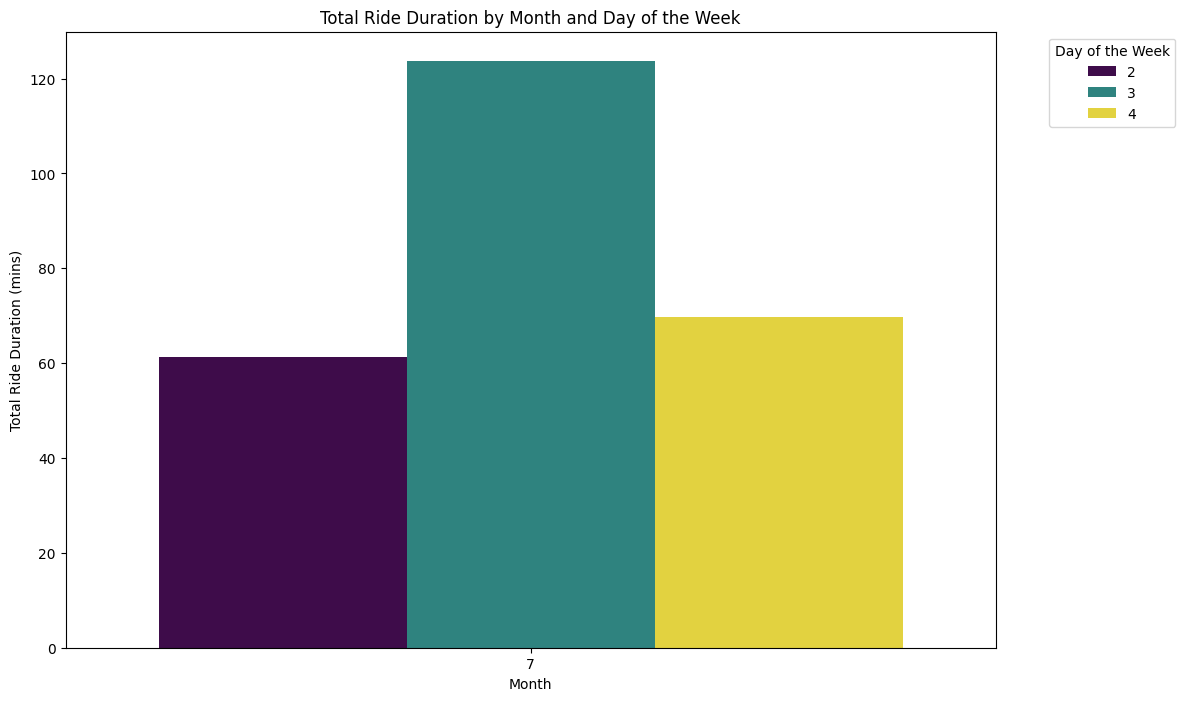

In [55]:
# Group by 'Request_Month', 'Day_of_week' and sum the 'Ride Duration'
monthly_duration = leastDriver.groupby(['Request_Month', 'Day_of_week'])['Ride Duration'].sum().reset_index()

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(data=monthly_duration, x='Request_Month', y='Ride Duration', hue='Day_of_week', palette='viridis')
plt.xlabel('Month')
plt.ylabel('Total Ride Duration (mins)')
plt.title('Total Ride Duration by Month and Day of the Week')
plt.legend(title='Day of the Week', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

<h5 style="color:gold">This driver has only worked in Month = 7 on days, Wednesday, Thursday and Friday</h5>